In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from pkg import pearson_corr, plot_twin_lines
os.chdir("/Users/caropark/FAO_ag_check_code/")
plt.rcParams.update({'font.size': 22})

# Input data

In [6]:
combined = pd.read_csv("./data/yield_comparison.csv").dropna()
usa = combined[combined['country']=="United States of America"]

corrs = (usa.groupby("cropname", group_keys=False)
         .apply(lambda d: pearson_corr(d, "csif_log_dt", "yield_log_dt"))
         .sort_values(ascending=False))

sorted_crops = corrs.index.tolist()

# Plot

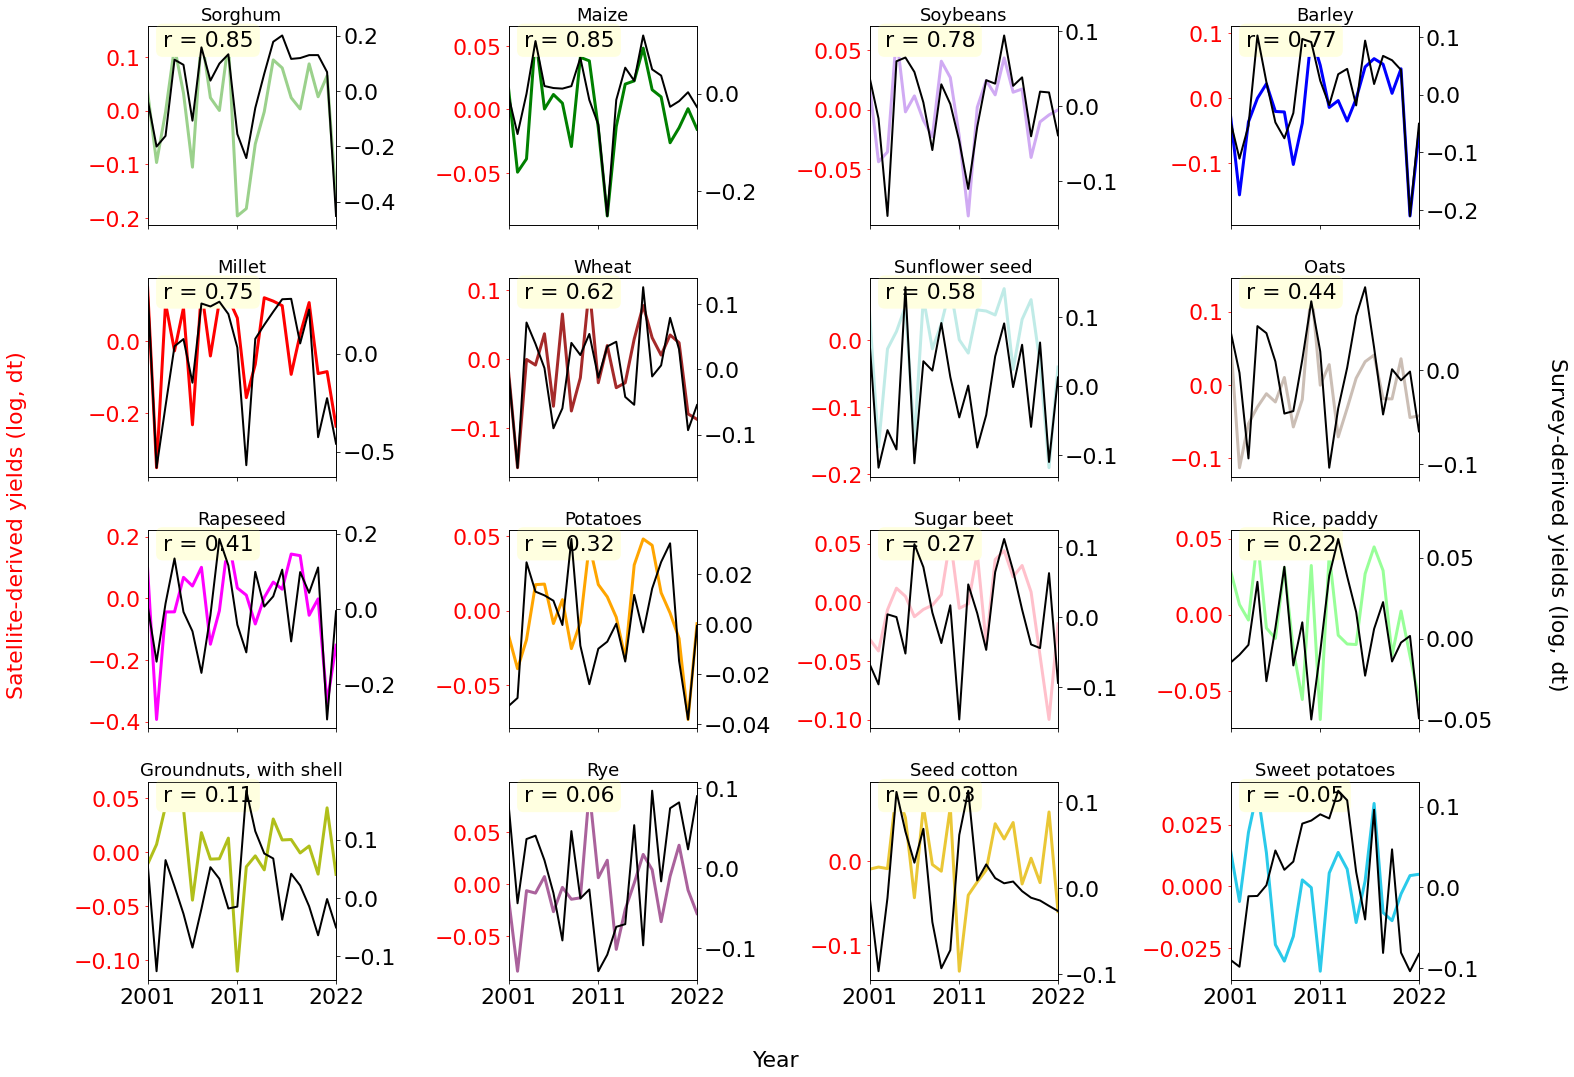

In [7]:
colors1 = ["blue", "green", "red", "orange", "#98ff98", "#eac736", "#d0aaf3", "pink", "#c0ebe7", "brown", "#cbbeb5", "#aa629c", "#b0bf1a", "#ff00ff", "#9bd18c", "#2acaea"]
plot_twin_lines(usa, col="cropname", col_wrap=4, 
                grid_kwargs={"hue":"cropname", 'palette': colors1}, plot_kwargs= None, filename="usa_ts_all")

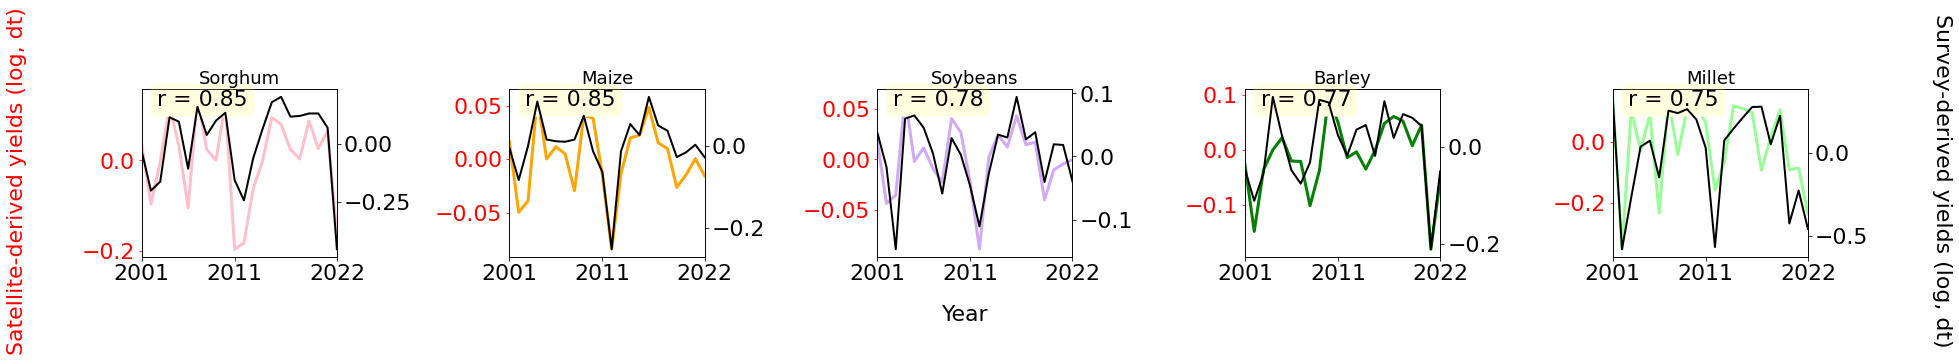

In [8]:
colors2 = ["green", "orange", "#98ff98", "#d0aaf3", "pink"]
best = usa[usa['cropname'].isin(sorted_crops[:5])]
plot_twin_lines(best, col="cropname", col_order = sorted_crops[:5], col_wrap=5, 
                grid_kwargs={"hue":"cropname", 'palette': colors2}, plot_kwargs= None, filename="usa_ts_best")

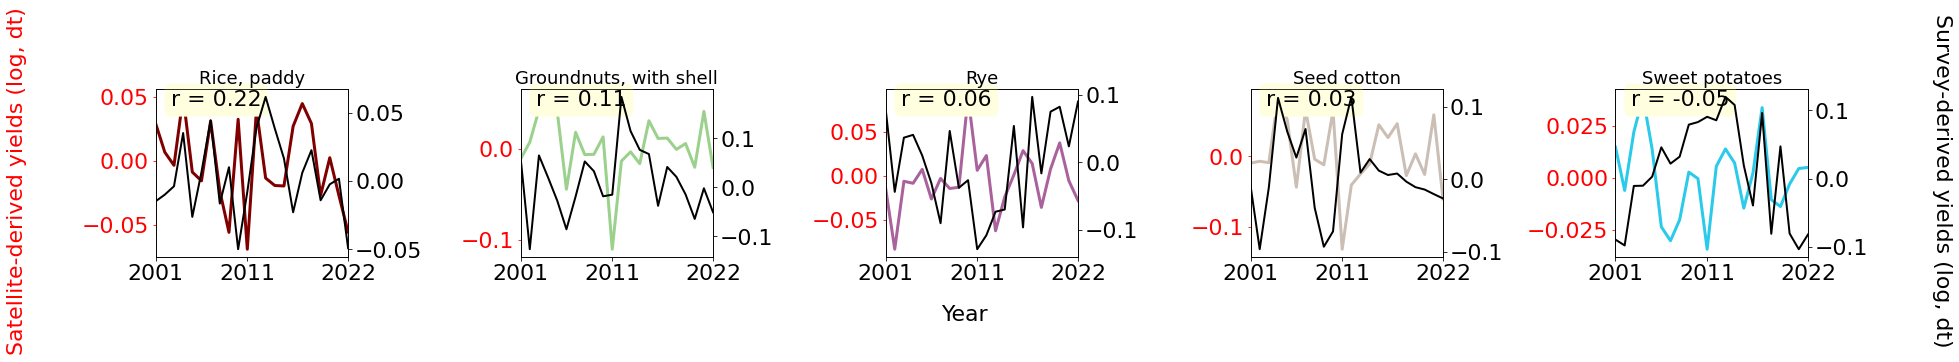

In [9]:
colors3 = ["maroon", "#cbbeb5", "#aa629c", "#9bd18c", "#2acaea"]
worst = usa[usa['cropname'].isin(sorted_crops[-5:])]
plot_twin_lines(worst, col="cropname", col_order = sorted_crops[-5:], col_wrap=5, 
                grid_kwargs={"hue":"cropname", 'palette': colors3}, plot_kwargs= None, filename= "usa_ts_worst")

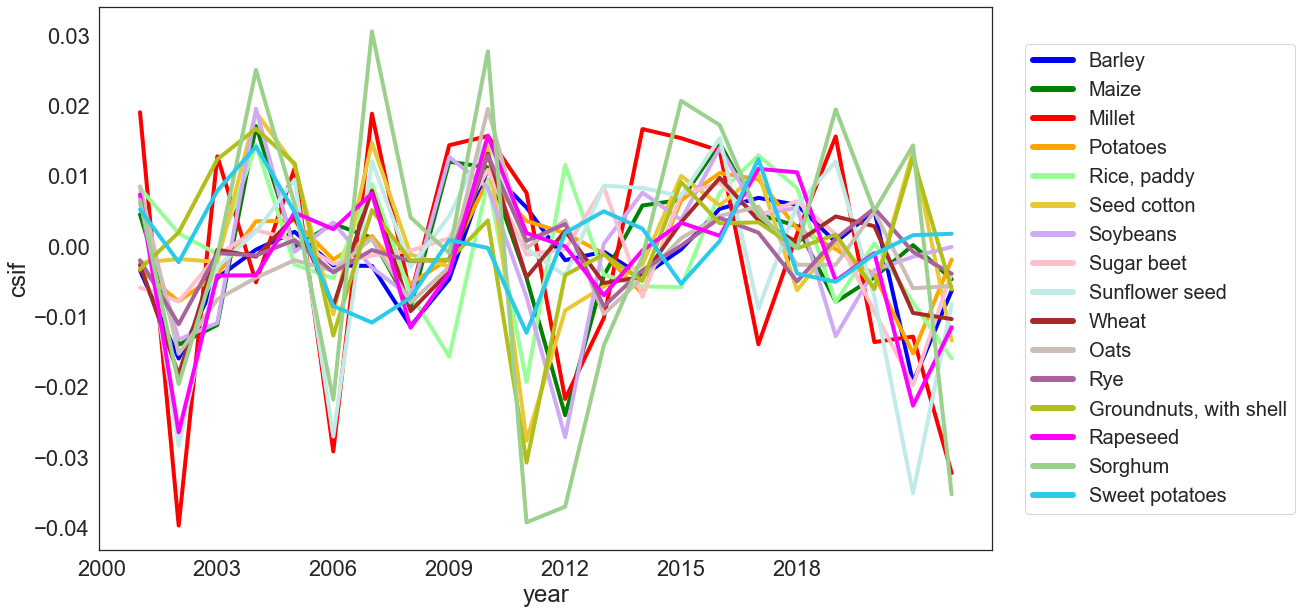

In [10]:
cropnum = len(np.unique(usa['cropname']))
allcrop = usa.copy()
plt.figure(figsize=(16, 10))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.lineplot(x='year', y='csif', hue='cropname', data=allcrop, palette=colors1, lw=4)
ax.set(xticks=list( [2000,2003,2006, 2009, 2012, 2015, 2018]))
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(6)
sns.move_legend(ax, "center right",  bbox_to_anchor=(1.35, 0.5), fontsize=20)
plt.savefig("./plots/usa_spaghetti.pdf")